c:\Users\jason\workspaces\repos\jrl\src\core_components\tiles\base.py:439: UserWarning: Cannot align corners without 'center', 'width', and 'height' attributes set.
  warn("Cannot align corners without 'center', 'width', and 'height' attributes set.", UserWarning)


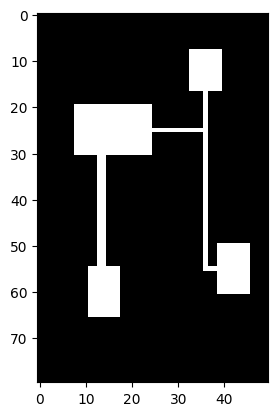

In [1]:

import numpy as np
from core_components.generators.library import DefaultDungeonGenerator
import matplotlib.pyplot as plt

gen = DefaultDungeonGenerator()
a = gen.generate()
layout = a.get_tile_layout('floor')
plt.imshow(layout, cmap='gray')
plt.show()


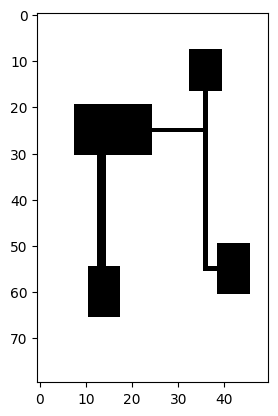

In [3]:
plt.imshow(a.traversable, cmap='gray')

In [2]:
a._graphics_manifest['graphics']['floor']['fixed_state_bits']

(0, 0, None, None)

In [ ]:
# area_idx = list(a.areas.keys())
# im_area = a.areas[area_idx[0]].to_mask

# path_idx = list(a.paths.keys())
# im_path = a.paths[path_idx[0]]

    # im_area = im_area | area.to_mask







In [ ]:
def istype(a: np.ndarray, dtype: np.dtype) -> bool:
    """Helper function to check if a numpy array is of a specific dtype"""
    if a.dtype.metadata is None or dtype.metadata is None:
        return False
    return a.dtype.metadata['__name__'] == dtype.metadata['__name__']

ascii_default = np.array((ord(' '), (255, 255, 255), (0, 0, 0)), dtype=ascii_graphic)

istype(ascii_default, ascii_graphic)  # True